# **Importing Necessary Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Train data size',train_data.shape)
print('Test data size',test_data.shape)

Train data size (891, 12)
Test data size (418, 11)


# **Knowing about the each variables**

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
Counter(train_data['Sex'])

Counter({'male': 577, 'female': 314})

In [13]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# **Exploratory Data Analysis**

In [16]:
#train_data = df
#df.head()
df = pd.DataFrame(train_data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


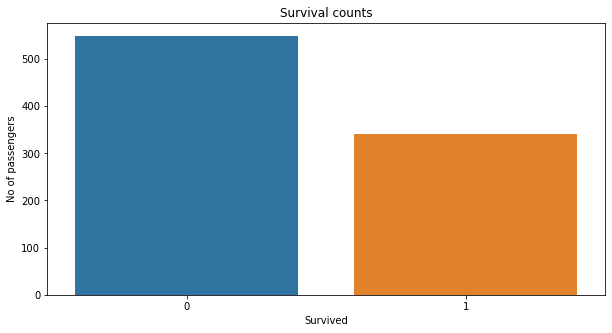

In [17]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts().values)
plt.title('Survival counts')
plt.xlabel('Survived')
plt.ylabel('No of passengers')
plt.show()

* 0 --> Not Survived
* 1 --> Survived

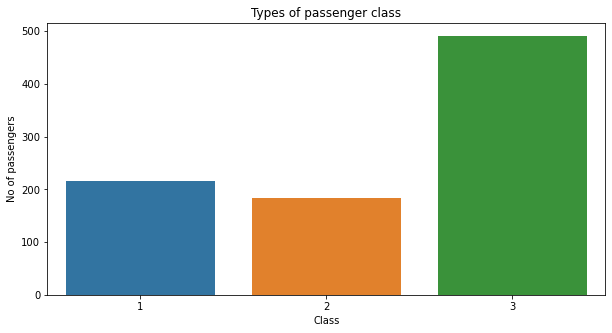

In [18]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['Pclass'].value_counts().index, y = df['Pclass'].value_counts().values)
plt.title('Types of passenger class')
plt.xlabel('Class')
plt.ylabel('No of passengers')
plt.show()

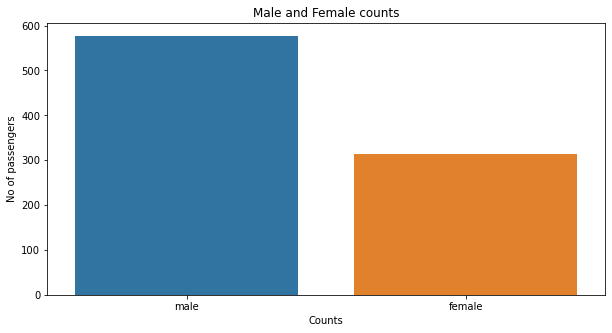

In [19]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['Sex'].value_counts().index, y = df['Sex'].value_counts().values)
plt.title('Male and Female counts')
plt.xlabel('Counts')
plt.ylabel('No of passengers')
plt.show()

* Among total no of passengers male counts are larger than the female. 

In [20]:
gender = pd.crosstab(tr['Survived'],tr['Sex'])
gender

NameError: name 'tr' is not defined

1. Here we can see survival rate for female is more than male.
2. And not survived counts are mostly men.

In [ ]:
gender.plot(kind="bar",title='No of passengers survived')
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['Embarked'].value_counts().index, y = df['Embarked'].value_counts().values)
plt.title('port')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['SibSp'].value_counts().index, y = df['SibSp'].value_counts().values)
plt.title('Number of siblings/spouses aboard')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.barplot(x = df['Parch'].value_counts().index, y = df['Parch'].value_counts().values)
plt.title('Number of parents/childrens aboard')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.countplot(x = 'Survived',hue = 'Pclass',data = df)
plt.show()

* Here we can see class 1 & 2 are slightly different having less no of counts has not survived.
* but class 3 had more counts in not survived.

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.countplot(x = 'Survived', hue = 'Embarked', data = df)
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.countplot(x = 'Survived', hue = 'SibSp', data = df)
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
sb.countplot(x = 'Survived', hue = 'Parch', data = df)
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,5
#plt.hist(df['Age'],bins =15,alpha = 0.9)
ax = df['Age'].hist(bins = 15,alpha = 0.9, color = 'green')
ax.set(xlabel = 'Age',ylabel = 'Count',title = 'Visualization of Ages')
plt.show()

In [ ]:
rcParams['figure.figsize'] = 10,10
sb.heatmap(df.corr(),annot = True,square = True,linewidths = 2,linecolor = 'black')

# Data Preparation

In [69]:
delete = ['Ticket','Cabin','Name','Fare','Embarked']

In [70]:
train = train_data.drop(delete,axis = 1)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [72]:
test = test_data.drop(delete,axis =1)

In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [74]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [75]:
train['Sex'] = enc.fit_transform(train['Sex'])

In [76]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0


In [77]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [78]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [79]:
train_data['Age'].median()

28.0

In [80]:
train_data['Age'].mean()

29.69911764705882

In [81]:
train.fillna(train['Age'].median(),inplace = True)

In [82]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [83]:
test.set_index(['PassengerId'],inplace = True)

In [84]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
892,3,male,34.5,0,0
893,3,female,47.0,1,0


In [85]:
train.set_index(['PassengerId'],inplace = True)

In [86]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,1,22.0,1,0
2,1,1,0,38.0,1,0
3,1,3,0,26.0,0,0
4,1,1,0,35.0,1,0
5,0,3,1,35.0,0,0


# Modelling

In [87]:
X = train[['Pclass','Sex','Age','SibSp','Parch']]
y = train.Survived

In [88]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
1,3,1,22.0,1,0
2,1,0,38.0,1,0


In [89]:
y.head(2)

PassengerId
1    0
2    1
Name: Survived, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier

In [91]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,KFold

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size=0.25)

In [93]:
models = []
models.append(('LG', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
# models.append(('XGB-TREE', XGBClassifier(booster='gbtree')))
# models.append(('XGB-DART', XGBClassifier(booster='dart')))
models.append(('GNB', GaussianNB()))

In [94]:
seed = 100
results = []
names = []
output = []
score = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits = 5,random_state = seed)
    result = model_selection.cross_val_score(model,np.array(X_train),np.array(y_train),cv=kfold,scoring=score)
    results.append(result)
    names.append(name)
    values = name,result.mean()
    output.append(values)
print(output)

[('LG', 0.7785321512737066), ('SVC', 0.6093255526876894), ('DTC', 0.7904275614409159), ('RFC', 0.796420154864774), ('KNC', 0.753035574009651), ('MLP', 0.8114577488497362), ('GNB', 0.7515767029514084)]


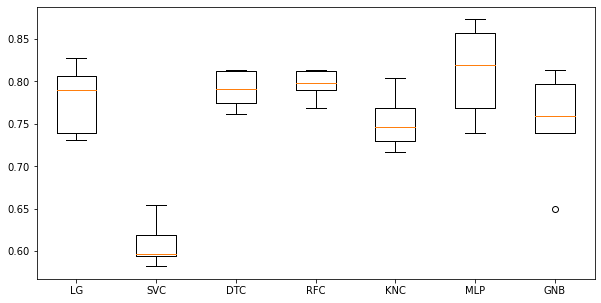

In [95]:
rcParams['figure.figsize'] = 10,5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* I am gonna use XGB because its performs well.

In [96]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_predict = model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [99]:
accuracy_score(y_test,y_predict).round(4)*100

84.3

In [100]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,134,13
1,22,54


In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       147
           1       0.81      0.71      0.76        76

    accuracy                           0.84       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



In [102]:
auc = roc_auc_score(y_test,y_predict)
print('XGB AUC : %.2f'%auc)

XGB AUC : 0.81


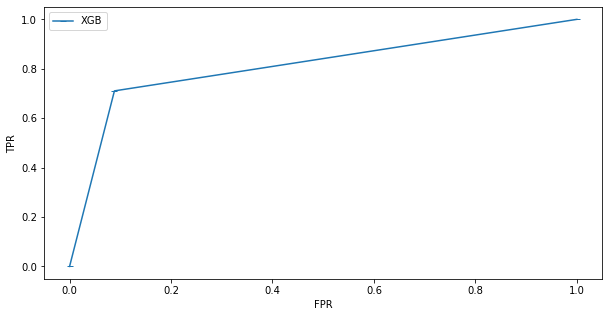

In [103]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,y_predict)
plt.plot(rf_fpr,rf_tpr,marker='_',label = 'XGB')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [104]:
test_predict = model.predict(X_test)

In [105]:
test_predict = pd.Series(test_predict)

In [106]:
test.reset_index(inplace = True)

In [107]:
predict = test['PassengerId']

In [108]:
predict = pd.concat([predict,test_predict], axis=1)

In [109]:
predict.rename(columns={0: "Survived"},inplace=True)

In [110]:
predict.to_csv("submission.csv",index=False)

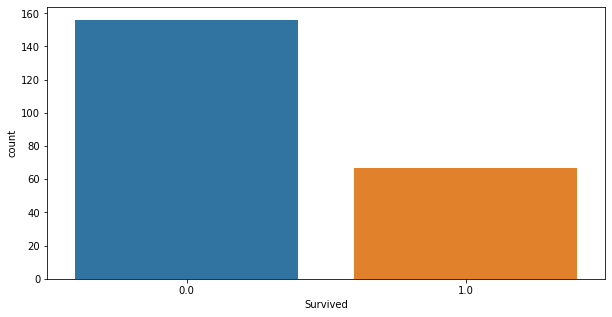

In [111]:
sb.countplot(predict.Survived)

In [ ]:
# pip install xgboost